In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models

from get_loader_v2_train_val_test import get_train_loader, get_val_test_loader, get_length_vocab, get_pad_index, get_vocab, show_image


from train_and_val import train, validate, val_visualize_captions

from models.models import  EncoderDecoder

import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [3]:
data_dir = 'data/Images/'
captions_file = 'data/captions.txt'

input_size = (224,224)

transform_train = transforms.Compose(
[
transforms.Resize(input_size),   
transforms.RandomHorizontalFlip(),          # ADDED RANDOM HORIZONTAL FLIP
transforms.ToTensor(),
])

transform_val = transforms.Compose(
[
transforms.Resize(input_size),
transforms.ToTensor(),
])

# Split data into train and test sets
df_captions = pd.read_csv(captions_file)
unique_images = df_captions['image'].unique()
train_images, test_images = train_test_split(unique_images, test_size=0.2, random_state=42)
train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)

train_df = df_captions[df_captions['image'].isin(train_images)]
val_df = df_captions[df_captions['image'].isin(val_images)]
test_df = df_captions[df_captions['image'].isin(test_images)]

lenght_train_df = get_length_vocab(data_dir=data_dir, dataframe=train_df, transform=transform_train)
lenght_val_df = get_length_vocab(data_dir=data_dir, dataframe=val_df, transform=transform_val)
lenght_test_df = get_length_vocab(data_dir=data_dir, dataframe=test_df, transform=transform_val)

pad_index = get_pad_index(data_dir=data_dir, dataframe=train_df, transform=transform_train)

vocab_train_df = get_vocab(data_dir=data_dir, dataframe=train_df, transform=transform_train)
vocab_val_df = get_vocab(data_dir=data_dir, dataframe=val_df, transform=transform_val)
vocab_test_df = get_vocab(data_dir=data_dir, dataframe=test_df, transform=transform_val)


# Create train, validation, and test data loaders
train_dataloader = get_train_loader(data_dir=data_dir, dataframe=train_df, transform=transform_train)
val_dataloader = get_val_test_loader(data_dir=data_dir, dataframe=val_df, transform=transform_val)
test_dataloader = get_val_test_loader(data_dir=data_dir, dataframe=test_df, transform=transform_val)

print(lenght_train_df)
print(len(vocab_train_df))

7265
7265


In [4]:
# Hyperparameters
embed_size = 400
hidden_size = 512
vocab_size_train = lenght_train_df
num_layers = 2
learning_rate = 0.0005
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
# initialize model, loss etc
model = EncoderDecoder(embed_size, hidden_size, vocab_size_train, num_layers).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=pad_index)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

c:\Users\Miguel\anaconda3\envs\Pytorch_2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Miguel\anaconda3\envs\Pytorch_2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Train Epoch: 0 loss: 4.30626

Validation set: Average loss: 0.40124


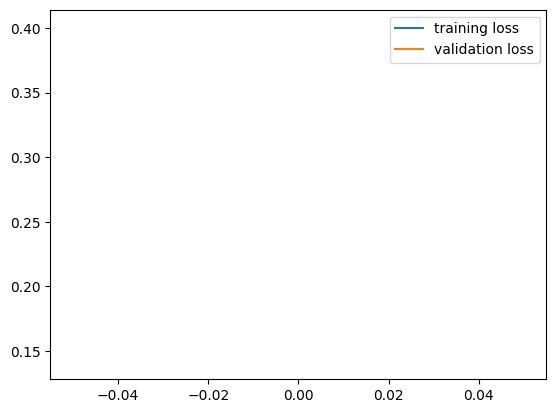

Train Epoch: 1 loss: 3.66983

Validation set: Average loss: 0.43067


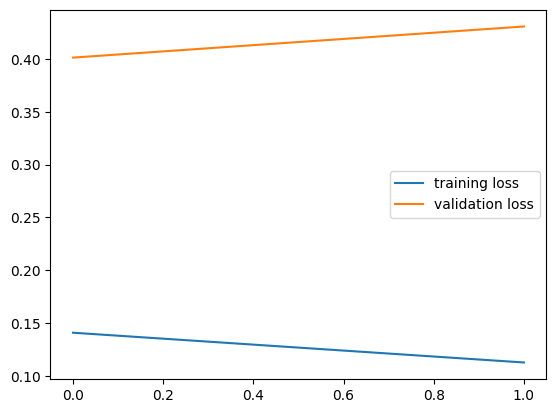

Train Epoch: 2 loss: 3.41066

Validation set: Average loss: 0.44663


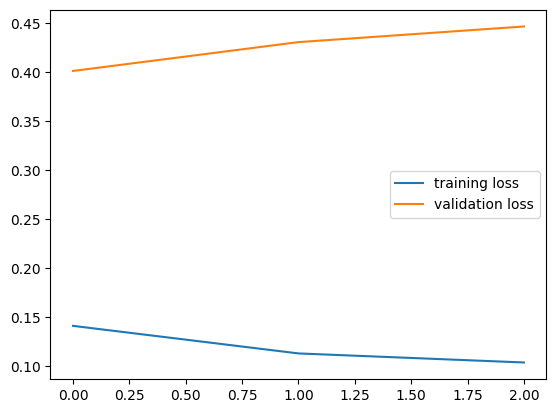

Train Epoch: 3 loss: 2.87702

Validation set: Average loss: 0.45951


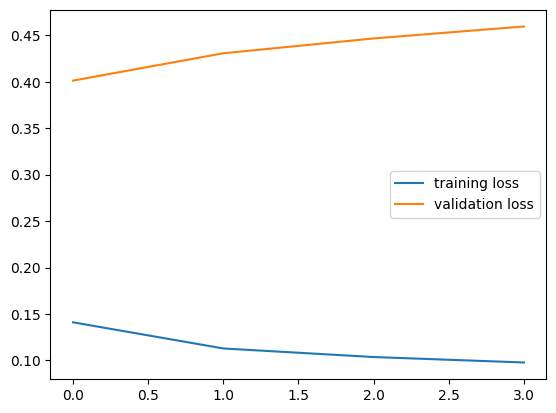

Train Epoch: 4 loss: 2.65115

Validation set: Average loss: 0.46900


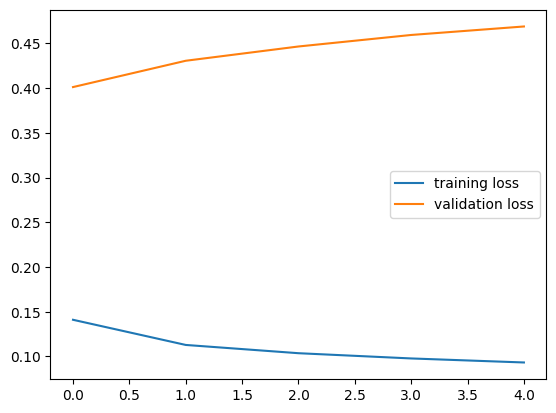

Train Epoch: 5 loss: 2.96997

Validation set: Average loss: 0.47702


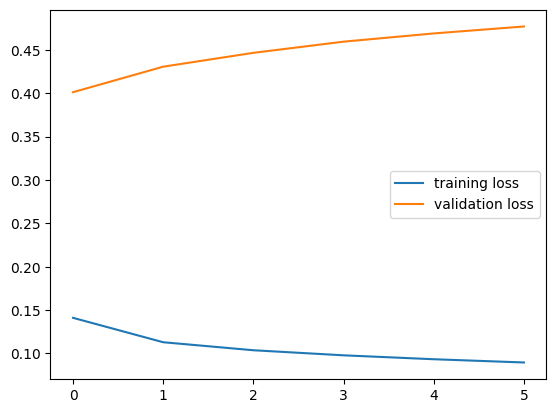

Train Epoch: 6 loss: 2.68709

Validation set: Average loss: 0.48692


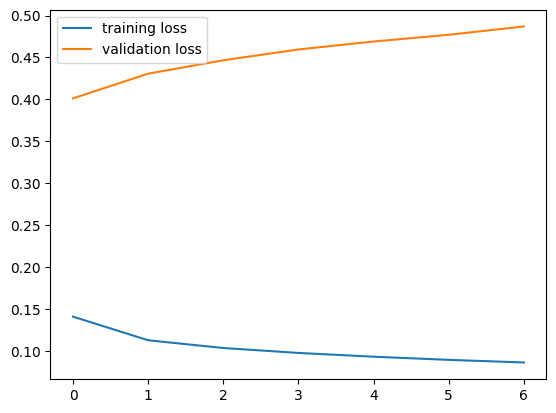

Train Epoch: 7 loss: 2.65869

Validation set: Average loss: 0.49712


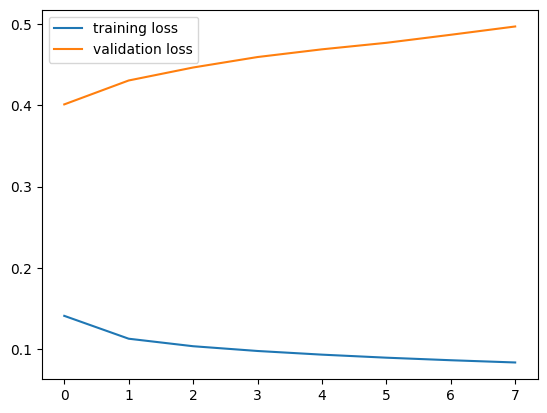

Train Epoch: 8 loss: 2.57203

Validation set: Average loss: 0.50279


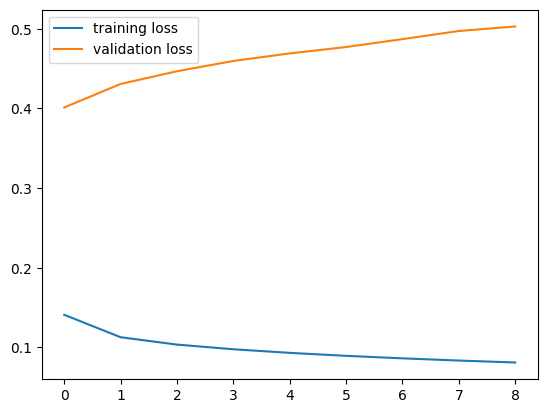

Train Epoch: 9 loss: 2.45253

Validation set: Average loss: 0.51398


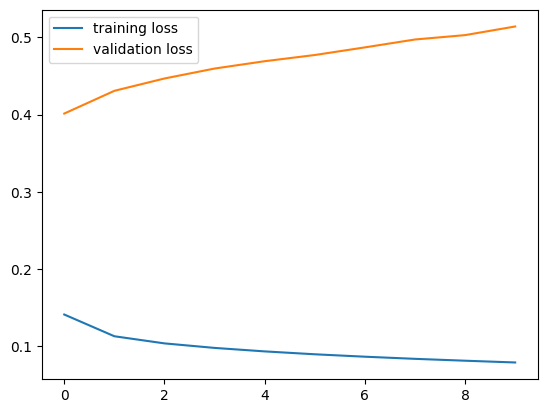

Train Epoch: 10 loss: 2.20226


KeyboardInterrupt: 

In [ ]:
### USING TRAIN AND VAL SEPARATED FUNCTIONS ONLY VISUALIZING LOSS VALUES FROM TRAINING AND VAL

losses = {"train": [], "val": []}
for epoch in range(20):

    train_loss = train(epoch, criterion, model, optimizer, train_dataloader, vocab_size_train, device)
    val_loss = validate(criterion, model, val_dataloader, vocab_size_train, vocab_train_df, device)
    losses["train"].append(train_loss)
    losses["val"].append(val_loss)
    
    plt.plot(losses["train"], label="training loss")
    plt.plot(losses["val"], label="validation loss")

    plt.legend()
    plt.pause(0.000001)
    plt.show()

Epoch: 1 loss: 3.73253
features shape - torch.Size([1, 400])
<SOS> a man in a red shirt and a white dog is in a red and white dog is in a red and white dog in a red and white


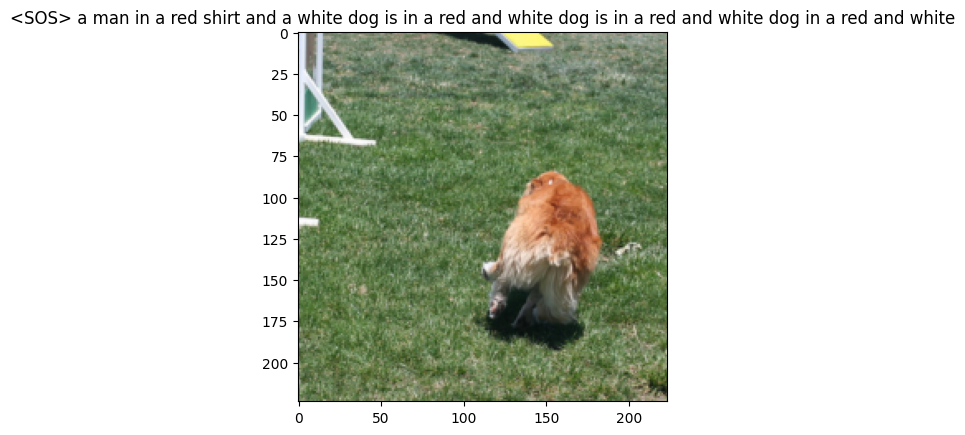

Epoch: 1 loss: 3.03843
features shape - torch.Size([1, 400])
<SOS> a man in a red shirt is running on a field . <EOS>


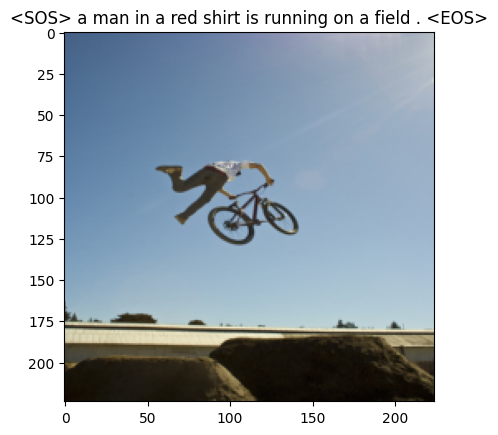

Epoch: 1 loss: 3.12392
features shape - torch.Size([1, 400])
<SOS> a man in a blue shirt is standing on a beach . <EOS>


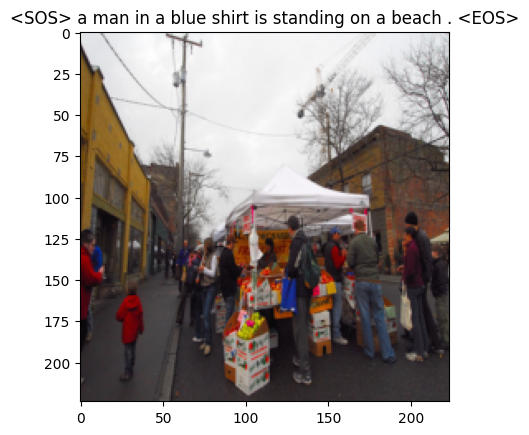

Epoch: 2 loss: 3.05536
features shape - torch.Size([1, 400])
<SOS> a man in a red shirt is standing on a beach . <EOS>


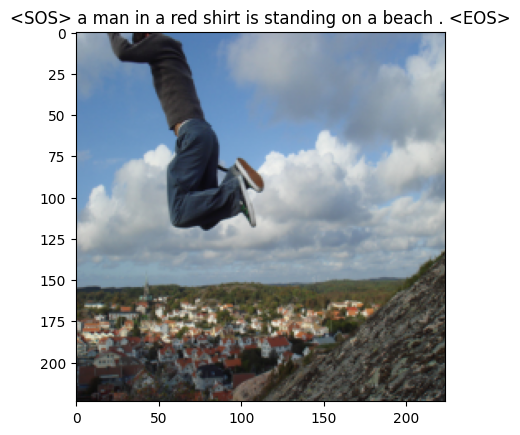

Epoch: 2 loss: 3.05413
features shape - torch.Size([1, 400])
<SOS> a man in a blue shirt is standing on a sidewalk with a man in a blue shirt . <EOS>


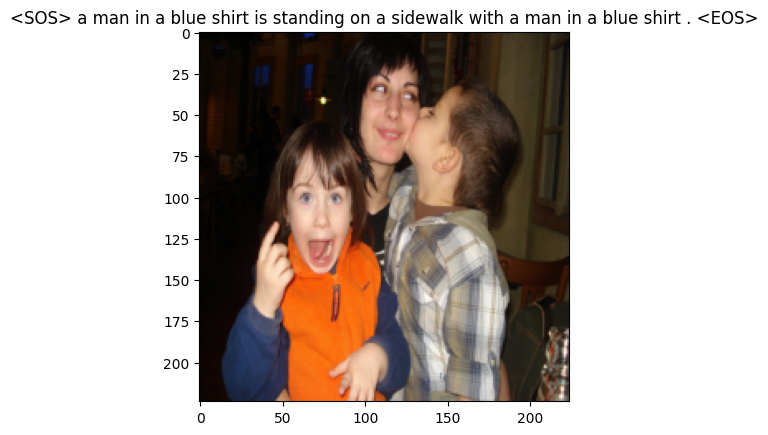

Epoch: 2 loss: 3.02887
features shape - torch.Size([1, 400])
<SOS> a dog is running through the snow . <EOS>


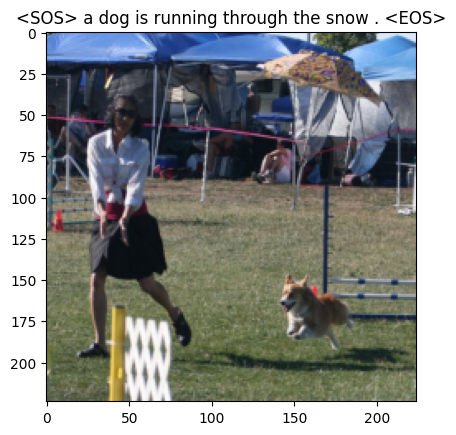

Epoch: 3 loss: 2.90617
features shape - torch.Size([1, 400])
<SOS> a man in a black shirt and a black shirt is standing on a bench . <EOS>


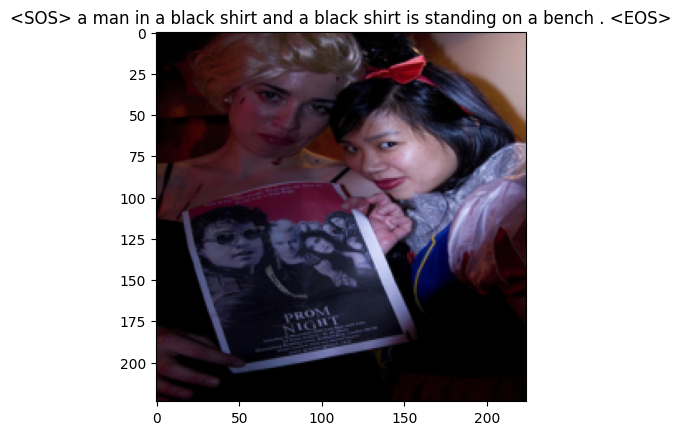

Epoch: 3 loss: 2.59879
features shape - torch.Size([1, 400])
<SOS> a dog is running through the grass . <EOS>


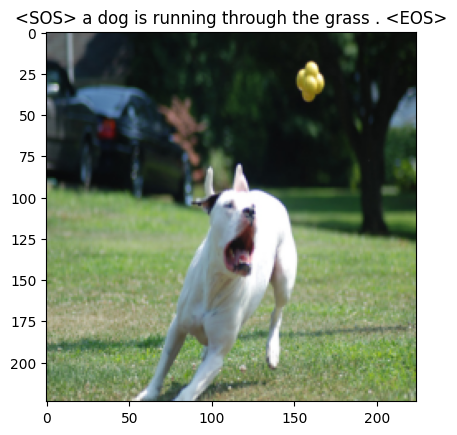

Epoch: 3 loss: 2.69833
features shape - torch.Size([1, 400])
<SOS> a dog is running through the grass . <EOS>


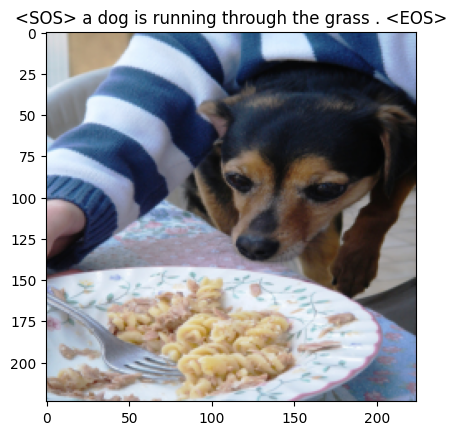

Epoch: 4 loss: 2.64397
features shape - torch.Size([1, 400])
<SOS> a man in a black jacket and a black jacket is standing in front of a building . <EOS>


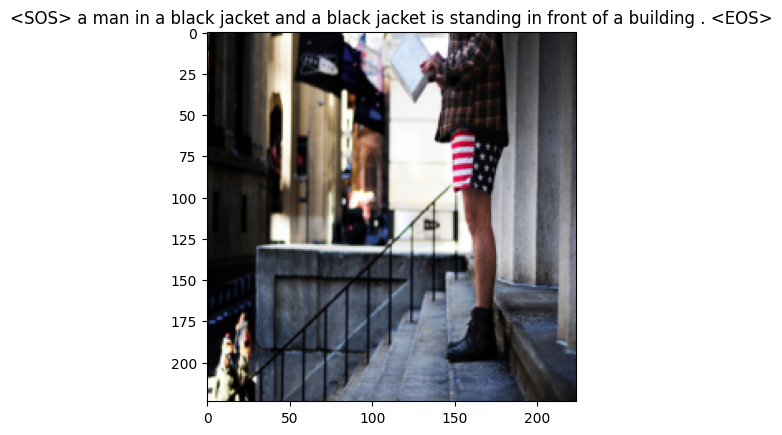

Epoch: 4 loss: 2.67368
features shape - torch.Size([1, 400])
<SOS> a man in a red shirt is riding a bike on a dirt path . <EOS>


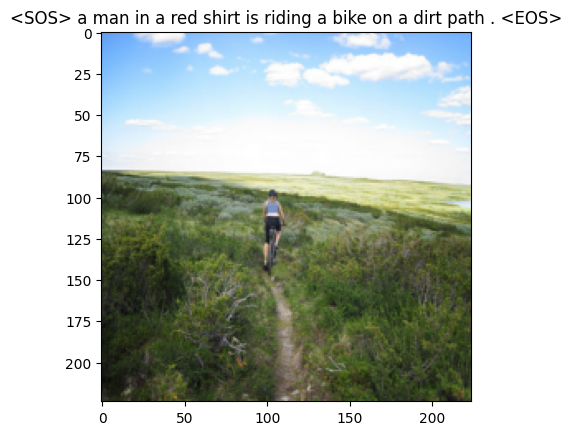

Epoch: 4 loss: 2.64867
features shape - torch.Size([1, 400])
<SOS> a man in a black shirt and a black hat is standing in front of a building . <EOS>


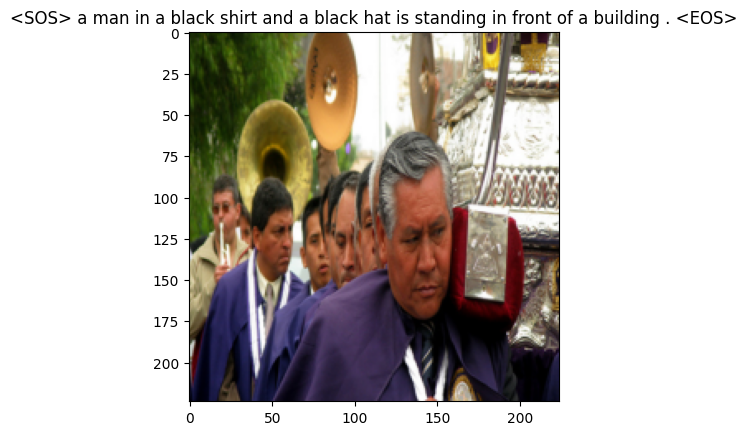

Epoch: 5 loss: 2.40575
features shape - torch.Size([1, 400])
<SOS> a man in a red shirt is standing in front of a crowd . <EOS>


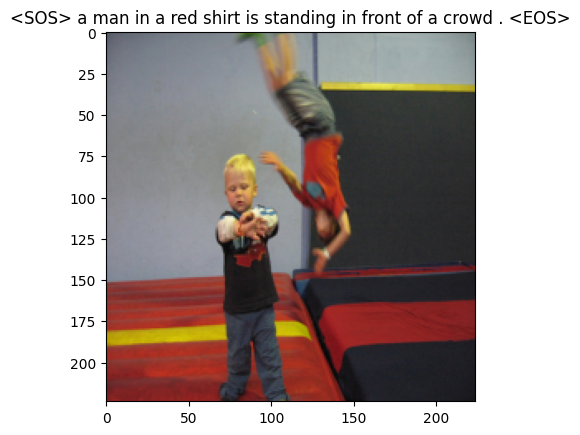

In [6]:
### USING A FUNCTION TO VISUALIZE THE CAPTIONS GENERATED IN VAL FROM THE TRAINING
val_visualize_captions(model, train_dataloader, val_dataloader, criterion, optimizer, device, vocab_size_train, vocab_train_df, 20)

In [ ]:
### LET'S TEST

# generate the captions for a whole batch
model.eval()
with torch.no_grad():
    # dls or validation_loader
    itr = iter(test_dataloader)
    img, captions, img_ids = next(itr)
    
    caption = captions[0:1][0].tolist()
    s = [test_dataloader.dataset.vocab.itos[idx] for idx in caption if idx != 0] # if idx != 0 and idx != 1 and idx != 2
    print("Original:", ' '.join(s))
    
    # extract features
    print(img[0:1].shape)
    features = model.encoder(img[0:1].to(device))

    # get predictions
    pred_caps, alphas = model.decoder.generate_caption(features, vocab=vocab_test_df)

    # make it printable
    caption = ' '.join(pred_caps)
    print("Predicted:", caption)
    show_image(img[0])